# Function Transformer
1. Our data converts into pdf, thereby increasing accuracy
2. Normal distribution is easy to handle

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

import scipy.stats as stats
import numpy as np

In [143]:
import pandas as pd
df = pd.read_csv('train.csv',usecols=['Fare','Survived','Age'])
df.sample(5)

,Survived,Age,Fare
532,0,17.0,7.2292
42,0,NaN,7.8958
470,0,NaN,7.2500
713,0,29.0,9.4833
598,0,NaN,7.2250


In [144]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [145]:
df.fillna(df['Age'].mean(),inplace=True)

In [146]:
xtrain,xtest,ytrain,ytest = train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.2)
xtrain

,Age,Fare
609,40.000000,153.4625
196,29.699118,7.7500
370,25.000000,55.4417
586,47.000000,15.0000
642,2.000000,27.9000
...,...,...
606,30.000000,7.8958
728,25.000000,26.0000
701,35.000000,26.2875
543,32.000000,26.0000


## QQ-plot: 
### To check data is skewed or not
1. Data lie perfectly on 45 deg line: Normal data
2. More it variates == More skewed


C:\Users\asus\AppData\Local\Temp\ipykernel_7396\1757456397.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtrain['Age'])


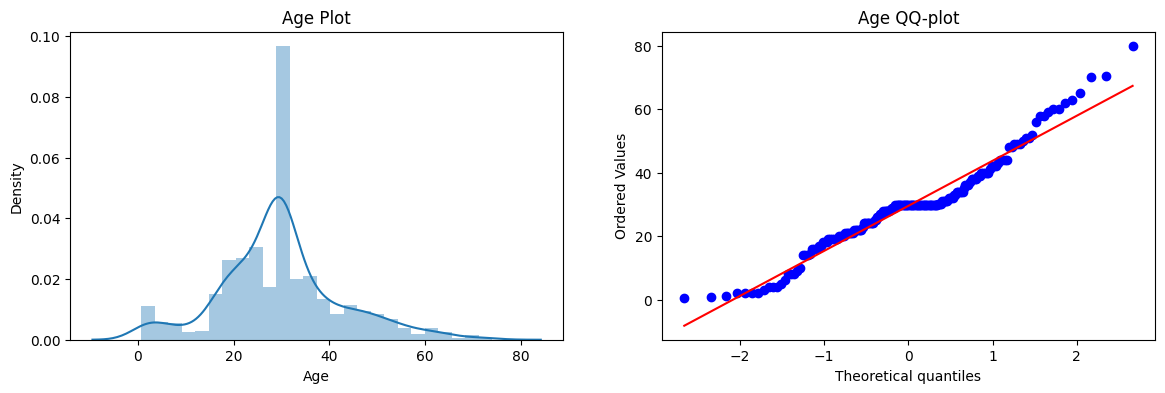

In [147]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(xtrain['Age'])
plt.title('Age Plot')

plt.subplot(122)
stats.probplot(xtest['Age'],dist="norm",plot=plt)
plt.title("Age QQ-plot")

plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_7396\3801761028.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtrain['Fare'])


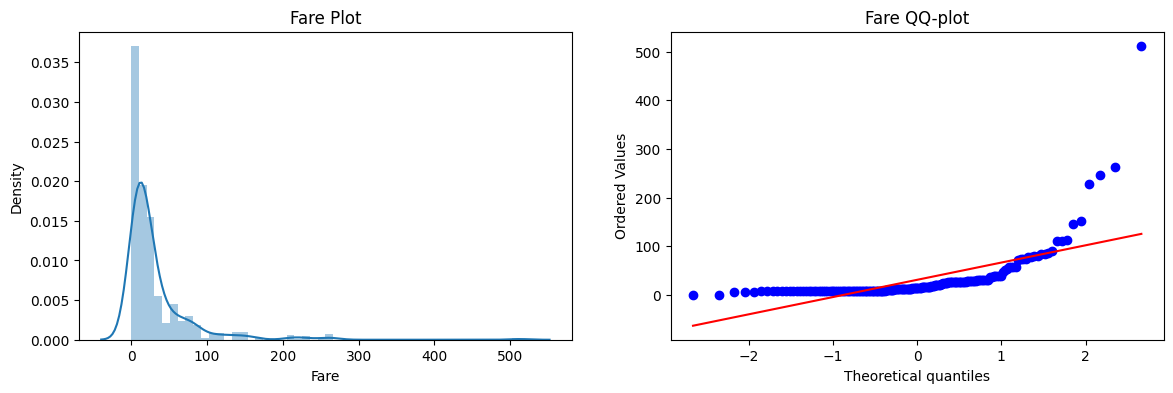

In [148]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(xtrain['Fare'])
plt.title('Fare Plot')

plt.subplot(122)
stats.probplot(xtest['Fare'],dist="norm",plot=plt)
plt.title("Fare QQ-plot")

plt.show()

In [149]:
clf = DecisionTreeClassifier()
clf.fit(xtrain,ytrain)

ypred = clf.predict(xtest)
accuracy_score(ytest,ypred)

0.659217877094972

### LOG TRANSFORM :: Best for Right Skewed
0. Best for Negative Skewed Data ### IMP
1. Just take log of each value
2. Data become Near Normal
3. Only positive Data
4. np.log : simple log but problem for 0
4. np.log1p : add 1 to all values

In [150]:
trf = FunctionTransformer(func=np.log1p)
xtrain_transformed = trf.fit_transform(xtrain)
xtest_transformed = trf.transform(xtest)

In [151]:
clf = DecisionTreeClassifier()
clf.fit(xtrain_transformed,ytrain)

ypred = clf.predict(xtest_transformed)
accuracy_score(ytest,ypred)

0.659217877094972

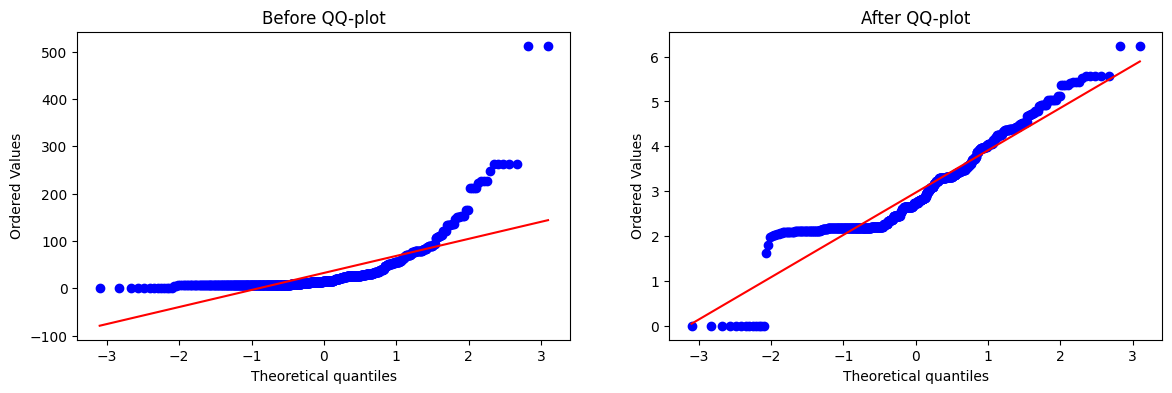

In [152]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(xtrain['Fare'],dist="norm",plot=plt)
plt.title("Before QQ-plot")
plt.subplot(122)
stats.probplot(xtrain_transformed['Fare'],dist="norm",plot=plt)
plt.title("After QQ-plot")

plt.show()

### Age was not Right Skewed So it got Worse

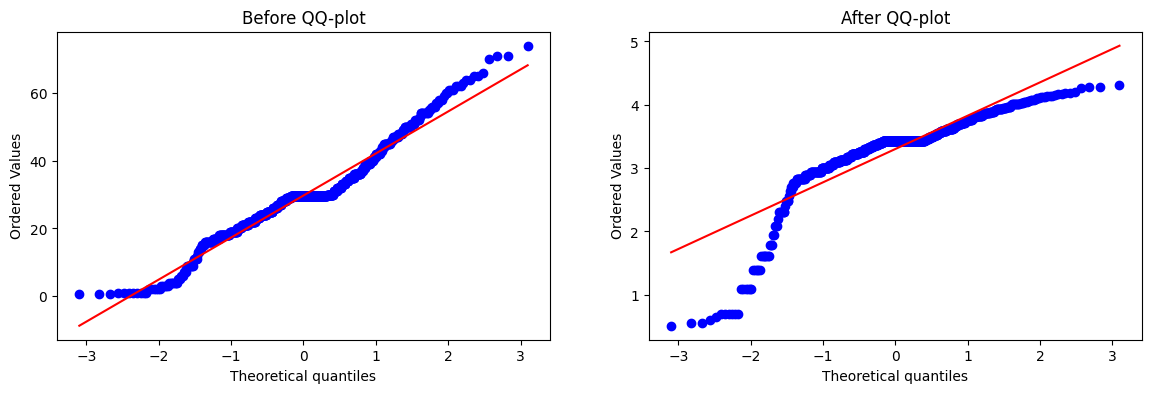

In [153]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(xtrain['Age'],dist="norm",plot=plt)
plt.title("Before QQ-plot")
plt.subplot(122)
stats.probplot(xtrain_transformed['Age'],dist="norm",plot=plt)
plt.title("After QQ-plot")

plt.show()

### Reciprocal Transform
1. 1/x TransForm
### X**2 Transform
1. For Left Skewed, i.e Negative skewed


In [154]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
def apply_transform(transform):
    X = df.iloc[:,1:]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder="passthrough")

    x_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    print(np.mean(cross_val_score(clf,x_trans,y,scoring="accuracy",cv=10)))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(X['Fare'],dist="norm",plot=plt)
    plt.title("Before QQ-plot")
    plt.subplot(122)
    stats.probplot(x_trans[:,0],dist="norm",plot=plt)
    plt.title("After QQ-plot")

    plt.show()    

0.6150561797752809


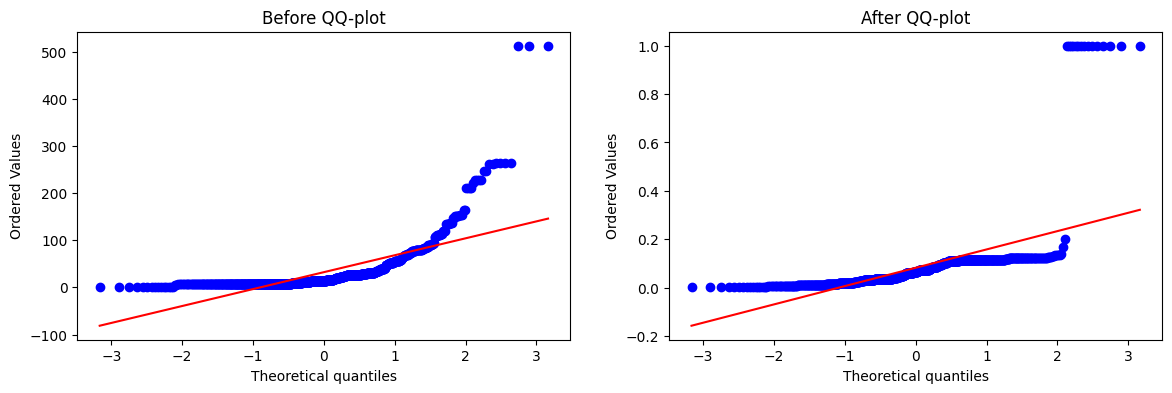

In [155]:
apply_transform(lambda x:1/(x+1))

0.6442446941323345


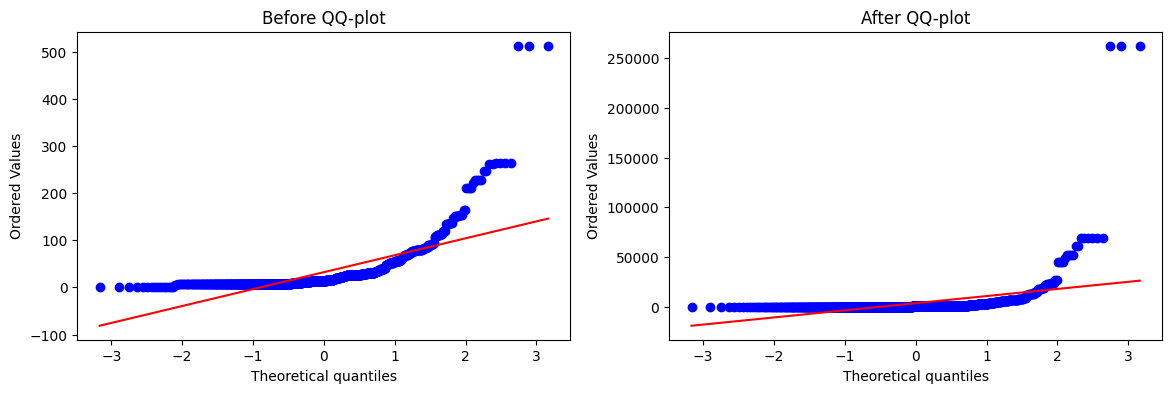

In [156]:
apply_transform(lambda x:x**2)

0.6195131086142323


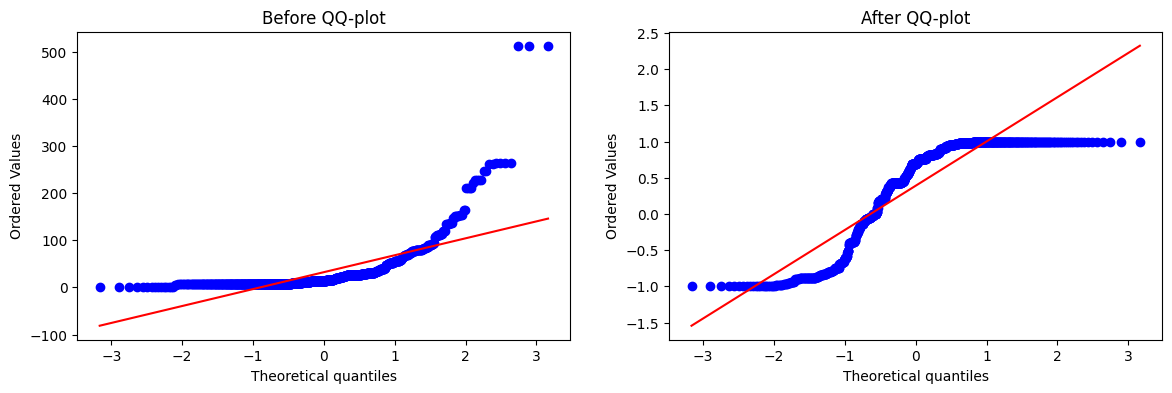

In [157]:
apply_transform(lambda x:np.sin(x))